In [29]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
img_horapa = [ f"{os.getcwd()}\HorapaVsKaprao\horapa\{i}" for i in os.listdir(os.getcwd() + '\HorapaVsKaprao\horapa')]
img_kaprao = [ f"{os.getcwd()}\HorapaVsKaprao\kaprao\{i}" for i in os.listdir(os.getcwd() + '\HorapaVsKaprao\kaprao')]

len(img_horapa), len(img_kaprao)

(454, 81)

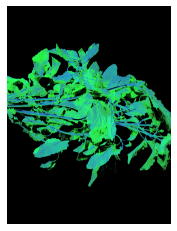

In [70]:
img = cv.imread(img_kaprao[10])
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lower = np.array([20,100,50])
upper = np.array([100,255,255])
mask = cv.inRange(img, lower, upper)
img = cv.bitwise_and(img, img, mask=mask)

plt.axis('off')
plt.imshow(img);

In [73]:
def pre_processing(path, central_crop=0.5, resize=225):
    
    img_list = list()
    for i in range(len(path)):
        
        img = cv.imread(path[i])
        img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        lower = np.array([20,100,50])
        upper = np.array([100,255,255])
        mask = cv.inRange(img, lower, upper)
        img = cv.bitwise_and(img, img, mask=mask)
        

        # img = tf.keras.utils.load_img(path[i])
        img = tf.keras.utils.img_to_array(img)
        img = tf.image.central_crop(img, central_crop)
        img = tf.image.resize(img, [resize,resize], preserve_aspect_ratio=False, antialias=True, method=tf.image.ResizeMethod.BILINEAR)
        img = tf.keras.utils.array_to_img(img)


        img_list.append(img)
    return img_list

img = pre_processing(img_horapa)

In [74]:
def preview_img(img):
    for i, im in enumerate(img):
        row = 4
        if i%row==0: 
            fig, axes = plt.subplots(1, row, figsize=(25,6))
        axes[i%row].axis('off')
        axes[i%row].imshow(im)
    plt.show();
    plt.clf();
    
preview_img(img)